In [21]:
import os, sys
import torch
root_dir = '../'
sys.path.append(root_dir)
from config import config
from model.train import load_eval
from model import datasets, utils
import matplotlib.pyplot as plt
from model.utils import compute_rdf

In [22]:
dir_paths = os.path.join(root_dir, 'output')

dir_paths = os.listdir(dir_paths)
dir_path = dir_paths[-1]

print(dir_path)

20250304_232443_N432_n432_k5_d3


In [38]:
dir_path = os.path.join(root_dir, 'output', dir_path)
path_param = '../config/params3d.yml'
cfg = config.load_config(path_param)
cfg.data.data_dir = '../md/data4/700K'
config.check_data_config(cfg)
config.check_device_config(cfg)
dataset = datasets.get_dataset(cfg)

mean_true = dataset.mean
std_true = dataset.std
x_true4 = dataset.x_sam


In [40]:
dir_path = os.path.join(root_dir, 'output', dir_path)
path_param = '../config/params3d.yml'
cfg = config.load_config(path_param)
cfg.data.data_dir = '../md/data6/700K'
config.check_data_config(cfg)
config.check_device_config(cfg)
dataset = datasets.get_dataset(cfg)

mean_true6 = dataset.mean
std_true6 = dataset.std
x_true6 = dataset.x_sam

In [43]:
dir_path = os.path.join(root_dir, 'output', dir_path)
path_param = '../config/params3d.yml'
cfg = config.load_config(path_param)
cfg.data.data_dir = '../md/data12/700K'
config.check_data_config(cfg)
config.check_device_config(cfg)
dataset = datasets.get_dataset(cfg)

mean_tru12 = dataset.mean
std_true12 = dataset.std
x_true12 = dataset.x_sam

In [44]:
import tqdm

In [ ]:
_, _, num_atoms = dataset.shape
num_samples = 1000
data = dataset.x_all[:num_samples]
print(data.shape)
for i in tqdm.tqdm(range(num_samples)):
    with open(f'../md/data12/xyz/output{i}.xyz', 'w') as f:
        f.write(f"{num_atoms}\n")
        f.write(f"Sample {i}\n")
        for j in range(num_atoms):
            x, y, z = data[i, :, j].tolist()
            f.write(f"Fe {x} {y} {z}\n")

torch.Size([1000, 3, 3456])


100%|██████████| 1000/1000 [01:56<00:00,  8.55it/s]


(0.0, 11.45797056652)

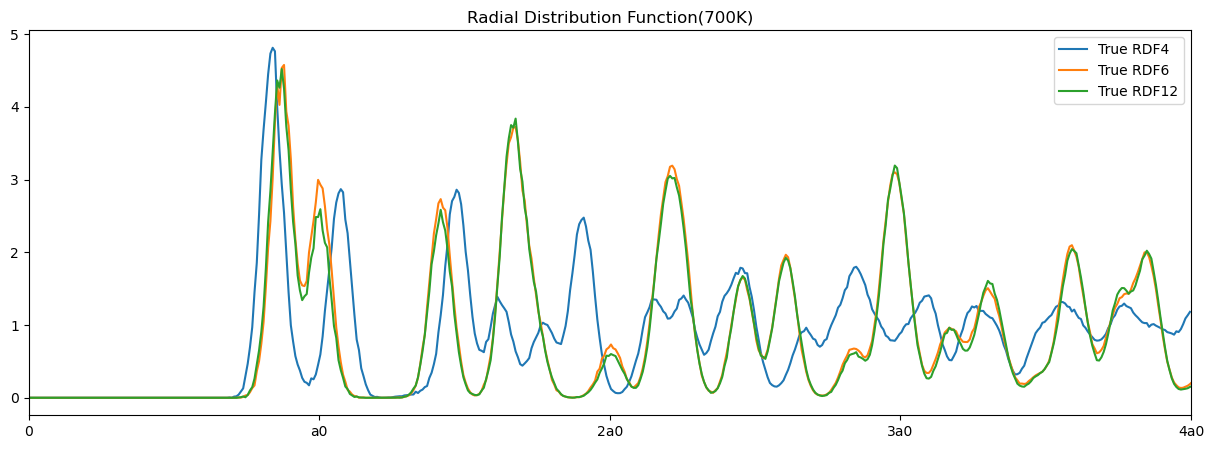

In [29]:
a0 = 2.86449264163000

fig, ax = plt.subplots(figsize=(15, 5))

# r_values, g_r = compute_rdf(x_pred, 6*a0, 6*a0, 0.5*a0, a0/64)
# ax.plot(r_values.cpu(), g_r.cpu(), label='Predicted RDF')
 
r_values_true4, g_r_true4 = compute_rdf(x_true4, 4*a0, 4*a0, 0.5*a0, a0/128)
ax.plot(r_values_true4.cpu(), g_r_true4.cpu(), label='True RDF4')

r_values_true6, g_r_true6 = compute_rdf(x_true6, 6*a0, 6*a0, 0.5*a0, a0/128)
ax.plot(r_values_true6.cpu(), g_r_true6.cpu(), label='True RDF6')

r_values_true12, g_r_true12 = compute_rdf(x_true12, 12*a0, 12*a0, 0.5*a0, a0/128)
ax.plot(r_values_true12.cpu(), g_r_true12.cpu(), label='True RDF12')

ax.set_title('Radial Distribution Function(700K)')

xticks = [0*a0, 1*a0, 2*a0, 3*a0, 4*a0, 5*a0, 6*a0]
xtick_labels = ['0', 'a0', '2a0', '3a0', '4a0', '5a0', '6a0']
ax.set_xticks(xticks)
ax.set_xticklabels(xtick_labels)
ax.legend()
ax.set_xlim(0.*a0, 4*a0)

